<a href="https://colab.research.google.com/github/mkjubran/ENEE4103/blob/master/DSB_SC_Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This experiment covers Double Sideband modulation and demodulation in the time and frequency domains. It also includes the effect of frequency and phase non-coherence.

Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# DSB-SC modulation in the time and frequency domains

In this section we will produce a DSB-SC signal $s(t)=A_c m(t)\cos(2 \pi f_ct)$ to plot it in the time and frequency domains and to study the effects of changing any of the signal parameters.

Let us start by producing the message signal $m(t)=A_m \cos(2 \pi f_mt)$, then  the carrier $c(t)=A_ccos(2 \pi f_ct)$, and then produce the DSB-SC signal $s(t)=A_c m(t)\cos(2 \pi f_ct)$ in the time and frequency domains

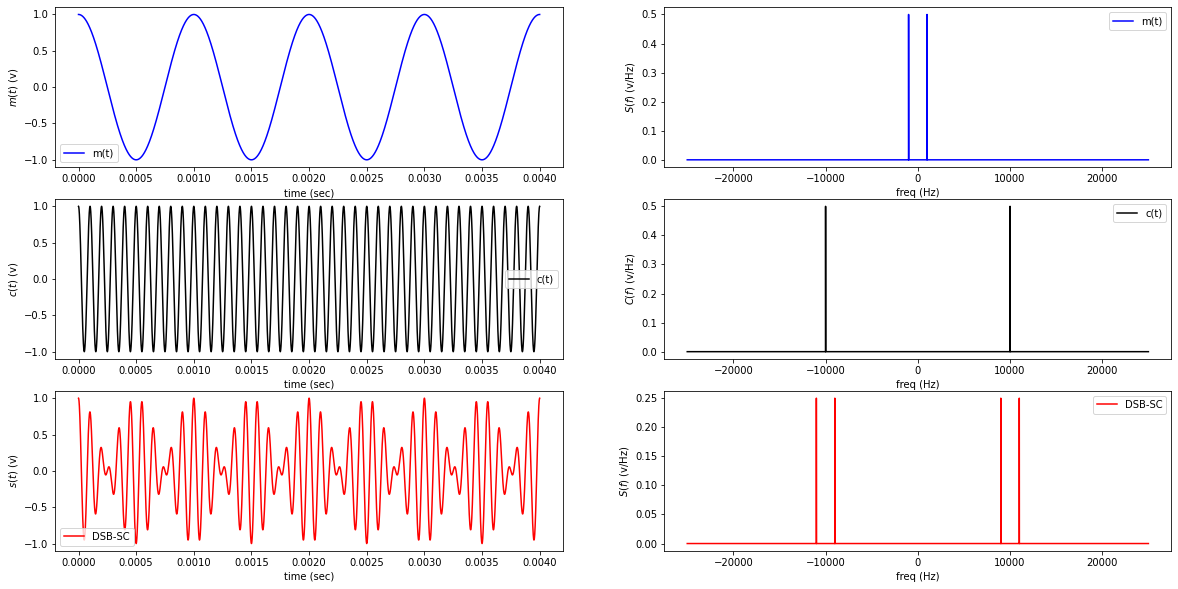

In [2]:
Am=1 # amplitude of message signal
fm=1000 # frequency of message signal
Ac=1 # amplitude of carrier signal
fc=10000 # frequency of carrier signal

## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=mt*ct # DSB-SC modulation

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=mt*ct # DSB-SC modulation

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- $f_m$ \\
2- $f_c$ \\
3- $A_m$ \\
4- $A_c$ \\

# DSB-SC modulation of a message signal with multiple harmonics *

Let us compute and plot the signal and spectrum of $x(t)=A_{m1}cos(2 \pi f_{m1}t)+A_{m2}cos(2 \pi f_{m2}t)+A_{m3}cos(2 \pi f_{m3}t)$

First we create a function to produce m(t)

In [8]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # message #1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # message #2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # message #3
   mt=m1t+m2t+m3t # message signal
   return mt

Then we create a function that produce c(t)

In [7]:
def func_ct(Ac,fc,t,phi):
   ct=Ac*np.cos(2*math.pi*fc*t+phi*math.pi/180) # carrier
   return ct

Now, we create a function that produce the DSB-SC modulated signal s(t)

In [9]:
def DSBSC_mod(mt,ct):
   st=mt*ct # DSB-SC modulation
   return st

In the next code, we will produce these signals and plot them in the time and frequency domain

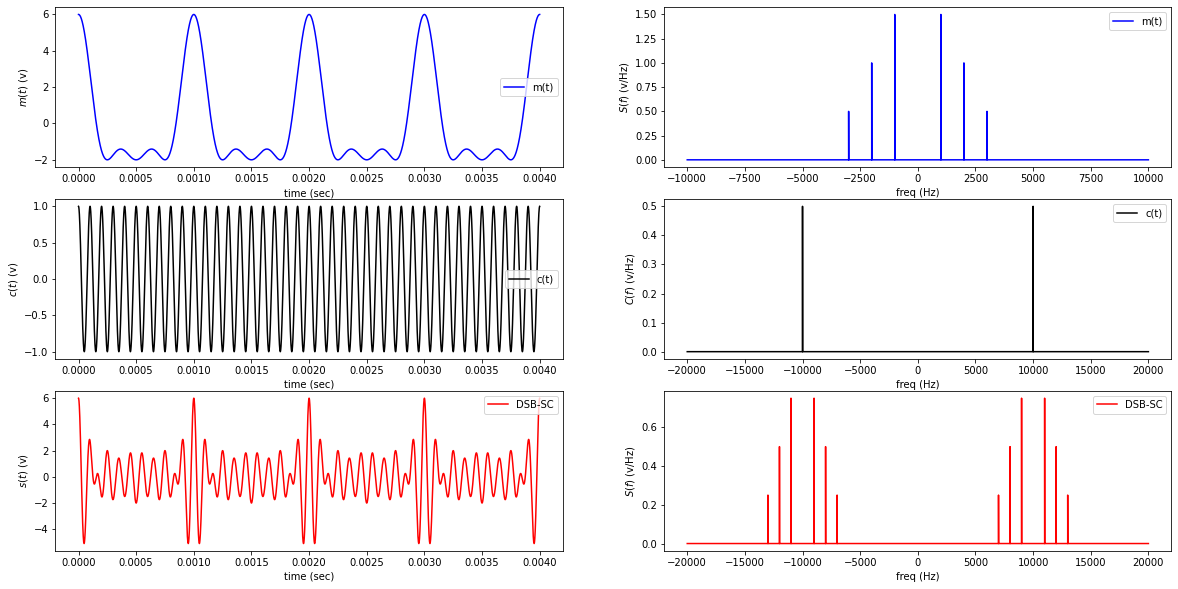

In [11]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=2 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=1 # amplitude of message signal
fm3=3000 # fequency of carrier signal


Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)

## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()


ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- The frequency of each component of the message signal; $f_{m1}$, $f_{m2}$, and $f_{m3}$ \\
2- $f_c$ \\
3- The Amplitude of each component of the message signal; $A_{m1}$, $A_{m2}$, and $A_{m3}$ \\
4- $A_c$ \\

# Demodulation of DSB-SC modulation using coherent demodulation

In this section we will demodulate a DSB-SC signal using coherent demodulation.

First, the DSB-SC signal is multiplied by the carrier signal $r(t)=c(t)s(t)=c(t)m(t)c(t)=A^2_cm(t)cos^2(2 \pi f_ct)$. Then, a LPF is used to recover the message signal.

Let us define the product modulator

In [15]:
def DSBSC_demod(st,ct):
   rt=st*ct #  DSB-SC demodulation
   return rt

Now we will modulate and demodulate the DSB-SC signal using coherent modulation

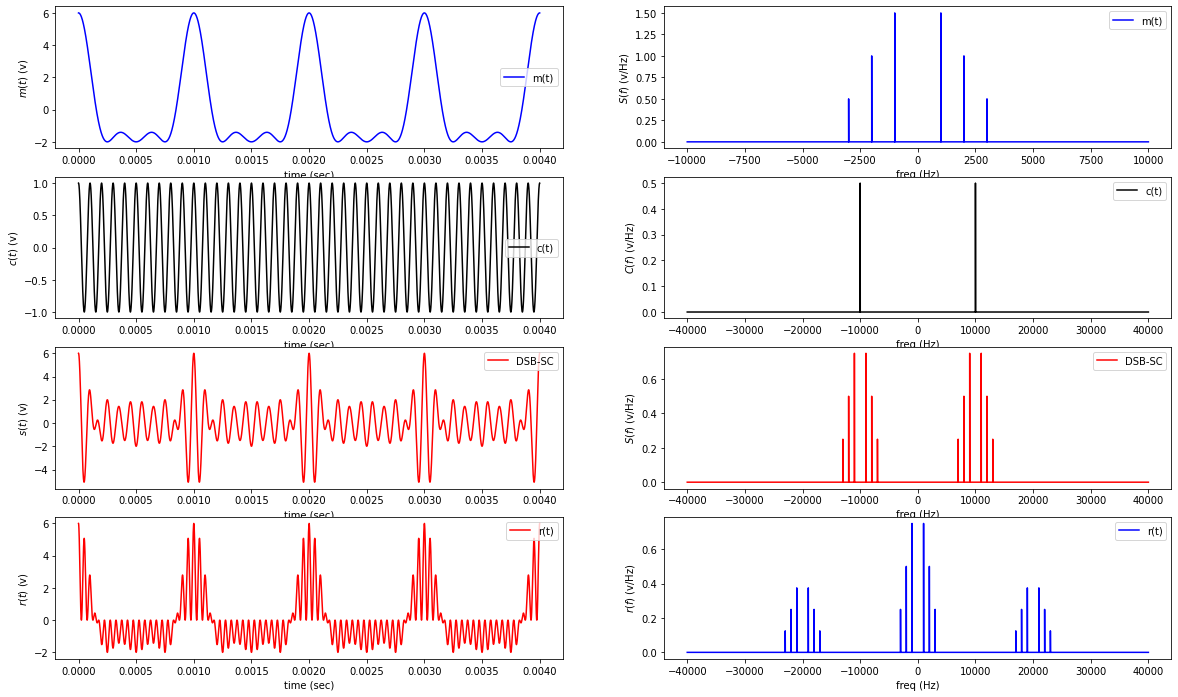

In [16]:
Am1=3 # amplitude of message signal
fm1=1000 # frequency of message signal

Am2=2 # amplitude of message signal
fm2=2000 # frequency of message signal

Am3=1 # amplitude of message signal
fm3=3000 # frequency of message signal

Ac=1 # amplitude of carrier signal
fc=10000 # frequency of carrier signal
Ka=0.5 # amplitude sensitivity

fm1_3=[fm1,fm2,fm3]

## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)

## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

rt=DSBSC_demod(st,ct) # DSB-SC demodulation

f = plt.figure(figsize=(20,12))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax7 = f.add_subplot(427)
ax8 = f.add_subplot(428)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

ax7.plot(t,rt,'r',label='r(t)')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$r(t)$ (v)')
ax7.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.125/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Rf = np.abs(np.fft.fft(rt))
freqs = np.fft.fftfreq(rt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Rf=Rf[idx]/N
ax8.plot(freqs, Rf,'b',label='r(t)')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$r(f)$ (v/Hz)')
ax8.legend()

Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

As can be observed from the amplitude spectrum of R(t), a Low pass filter (LPF) is needed to recover the modulated signal $\hat{m}(t)$ and remove the high freqiency components at $2f_c$ and $-2f_c$.


Let us define a Butterworth Low Pass filter with Bandwidth equal to $f_{3dB}$.

In [17]:
#f3db : cut-off frequency
#forder: order of the filter
from scipy import signal
def func_filter(rt,f3db,Tstep,forder):
   fs=1/Tstep
   w = f3db / (fs / 2) # Normalize the frequency
   b, a = signal.butter(forder, w, 'low')
   output = signal.filtfilt(b, a, rt)
   return output

Let us plot the frequency response of the LPF

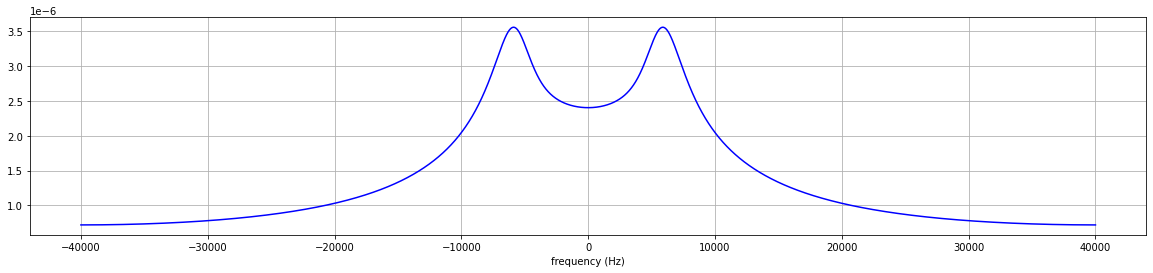

In [30]:
# LPF parameters 
f3db = 6000  # Cut-off frequency of the filter
forder=5 # order of the filter

L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output = func_filter(impls,f3db,Tstep,forder)

## plot the transfer function of the filter
N=len(t)           
FILTER_OUTPUT = np.abs(np.fft.fft(Filter_output))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT=FILTER_OUTPUT[idx]/N
plt.figure(figsize=(20,4))
plt.plot(freqs, FILTER_OUTPUT,'b')
plt.xlabel('frequency (Hz)')
xticks = np.arange(np.min(freqs), np.max(freqs), 500)
#plt.xticks(xticks)
plt.grid()


Now, let us apply the filter with $f_{3dB}=BW$ and observe the output. $BW$ is the bandwidth of $m(t)$.

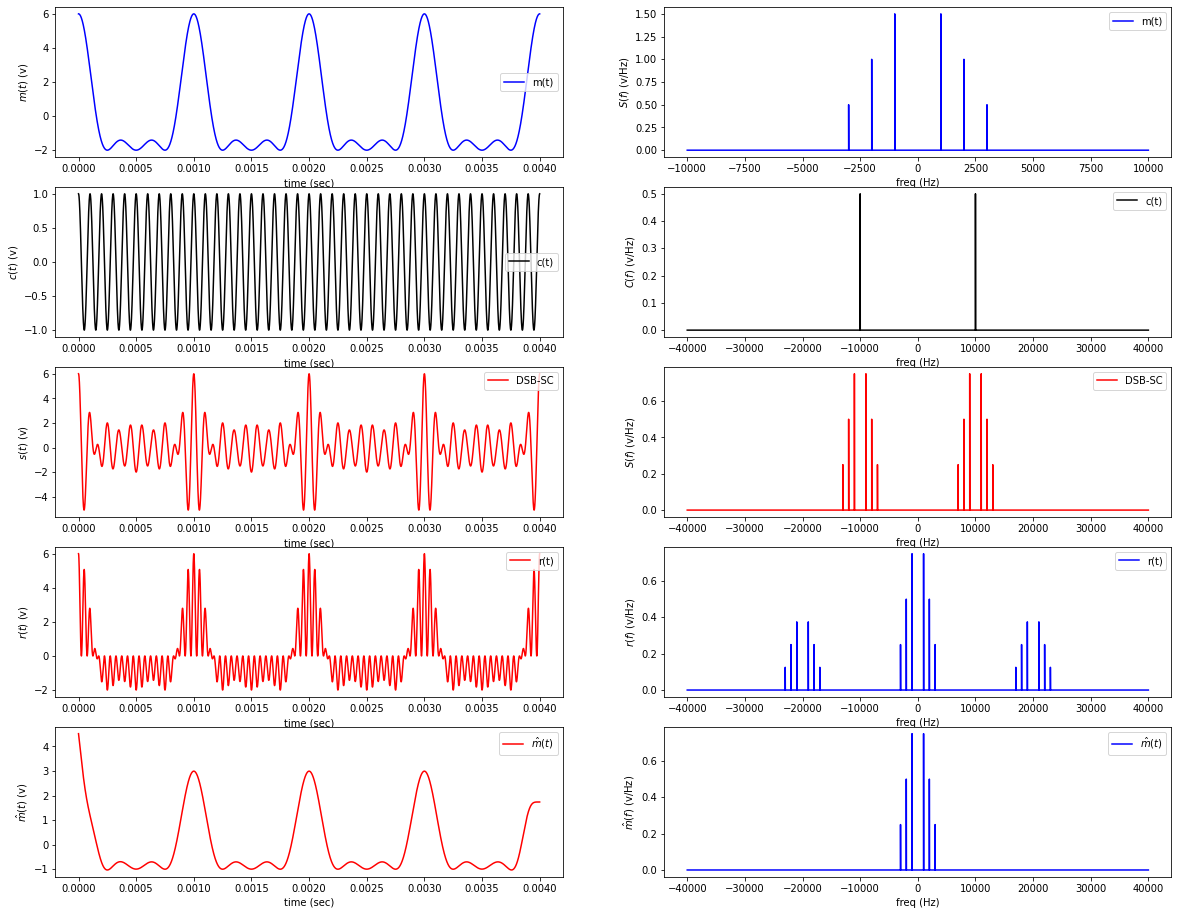

In [19]:
Am1=3 # amplitude of message signal
fm1=1000 # frequency of message signal

Am2=2 # amplitude of message signal
fm2=2000 # frequency of message signal

Am3=1 # amplitude of message signal
fm3=3000 # frequency of message signal

Ac=1 # amplitude of carrier signal
fc=10000 # frequency of carrier signal

fm1_3=[fm1,fm2,fm3]

## LPF parameters 
f3db = 6000  # Cut-off frequency of the filter
forder=5 # order of the filter

## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)

## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

rt=DSBSC_demod(st,ct) # DSB-SC demodulation

## apply the filter
mhat=func_filter(rt,f3db,Tstep,forder)

f = plt.figure(figsize=(20,16))
ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax5 = f.add_subplot(525)
ax6 = f.add_subplot(526)
ax7 = f.add_subplot(527)
ax8 = f.add_subplot(528)
ax9 = f.add_subplot(529)
ax10 = f.add_subplot(5,2,10)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()


ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

ax7.plot(t,rt,'r',label='r(t)')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$r(t)$ (v)')
ax7.legend()

ax9.plot(t,mhat,'r',label='$\hat{m}(t)$')
ax9.set_xlabel('time (sec)')
ax9.set_ylabel('$\hat{m}(t)$ (v)')
ax9.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.125/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

mhat=func_filter(rt,f3db,Tstep,forder)
mhat=np.array(mhat)

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Rf = np.abs(np.fft.fft(rt))
freqs = np.fft.fftfreq(rt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Rf=Rf[idx]/N
ax8.plot(freqs, Rf,'b',label='r(t)')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$r(f)$ (v/Hz)')
ax8.legend()

Mhatf = np.abs(np.fft.fft(mhat))
freqs = np.fft.fftfreq(mhat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mhatf=Mhatf[idx]/N
ax10.plot(freqs, Mhatf,'b',label='$\hat{m}(t)$')
ax10.set_xlabel('freq (Hz)')
ax10.set_ylabel('$\hat{m}(f)$ (v/Hz)')
ax10.legend()


As can be observed, the modulating signal (message) has been recovered.

**Exercise**: Change the following parameters in the code (first few lines) and observe the change in signals and their spectrum: \\
1- $f_c$ \\
2- The frequency of each component of the message signal; $f_{m1}$, $f_{m2}$, and $f_{m3}$ \\
3- $f_{3dB}$ \\
4- Order of the LPF \\


# DSB-SC modulation/demodulation: effect of carrier noncoherence in phase  on demodulated signal

Let us simulate DSB-SC demdoulation with carrier noncoherence in phase, let us assume phase difference of 80 degree

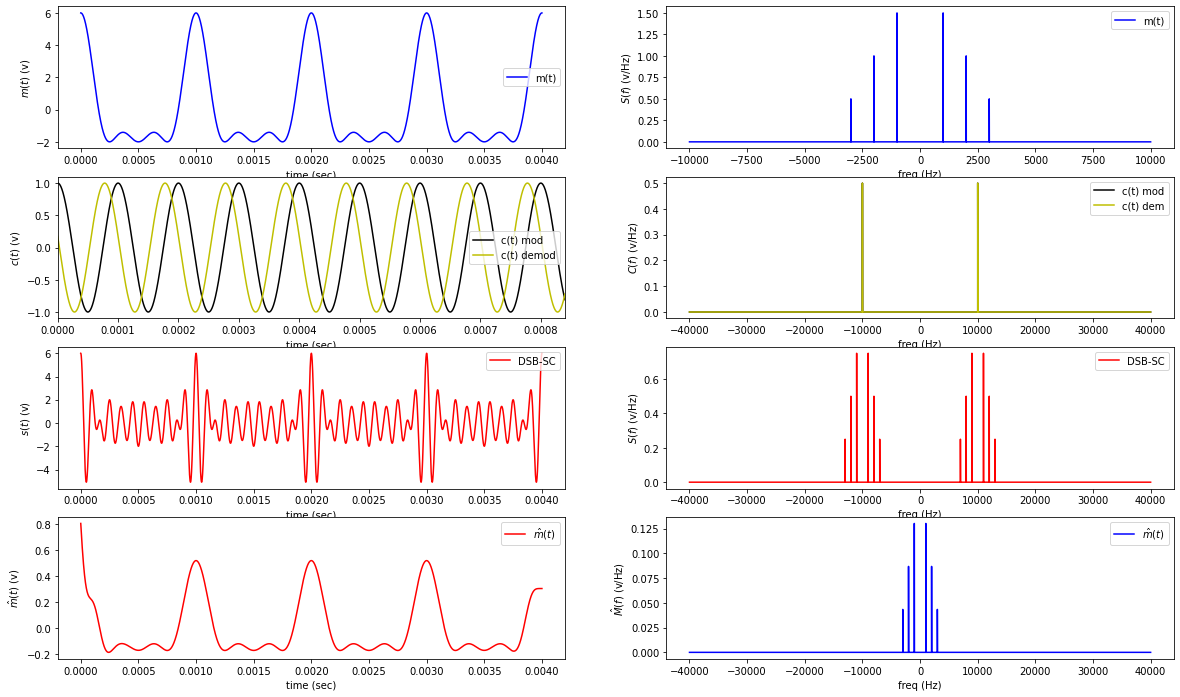

In [21]:
Am1=3 # amplitude of message signal
fm1=1000 # frequency of message signal

Am2=2 # amplitude of message signal
fm2=2000 # frequency of message signal

Am3=1 # amplitude of message signal
fm3=3000 # frequency of message signal

Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

## LPF parameters 
f3db = 6000  # Cut-off frequency of the filter
forder=5 # order of the filter

Phi=80 #carrier noncoherence in phase
###############################################
## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)

## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm
t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

# DSB-SC Modulation
ct_mod=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct_mod) # DSB-SC modulation

## DSB-SC Demodulation
ct_dem=func_ct(Ac,fc,t,Phi) # carrier
rt=DSBSC_demod(st,ct_dem) # DSB-SC demodulation

## apply the filter
mhat=func_filter(rt,f3db,Tstep,forder)

f = plt.figure(figsize=(20,12))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax7 = f.add_subplot(427)
ax8 = f.add_subplot(428)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct_mod,'k',label='c(t) mod')
ax3.plot(t,ct_dem,'y',label='c(t) demod')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
xmin, xmax = ax3.get_xlim()
ax3.set_xlim([0, xmax/5])
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

ax7.plot(t,mhat,'r',label='$\hat{m}(t)$')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$\hat{m}(t)$ (v)')
ax7.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.125/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

# DSB-SC Modulation
ct_mod=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct_mod) # DSB-SC modulation

# DSB-SC Demodulation
ct_dem=func_ct(Ac,fc,t,Phi) # carrier
rt=DSBSC_demod(st,ct_dem) # DSB-SC demodulation

mhat=func_filter(rt,f3db,Tstep,forder)
mhat=np.array(mhat)

## cf at mod
Cf = np.abs(np.fft.fft(ct_mod))
freqs = np.fft.fftfreq(ct_mod.size, Tstep)
idx = np.argsort(freqs)
freqs_mod=freqs[idx]
Cf_mod=Cf[idx]/N

## cf at demod
Cf = np.abs(np.fft.fft(ct_dem))
freqs = np.fft.fftfreq(ct_dem.size, Tstep)
idx = np.argsort(freqs)
freqs_dem=freqs[idx]
Cf_dem=Cf[idx]/N

ax4.plot(freqs_mod, Cf_mod,'k',label='c(t) mod')
ax4.plot(freqs_dem, Cf_dem,'y',label='c(t) dem')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Mhatf = np.abs(np.fft.fft(mhat))
freqs = np.fft.fftfreq(mhat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mhatf=Mhatf[idx]/N
ax8.plot(freqs, Mhatf,'b',label='$\hat{m}(t)$')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$\hat{M}(f)$ (v/Hz)')
ax8.legend()

As can be observed the demodulated signal is highly attenutaed. However, the modulating (message) signal can still be recovered.

**Exercise**: Change the phase of carrier at demodulator and observe the demdoulated signal.

# DSB-SC modulation/demodulation: effect of carrier noncoherence in frequency on demodulated signal

Let us simulate DSB-SC demdoulation with carrier noncoherence in frequency, le us assume frequency deviation (df) of 500 Hz. 

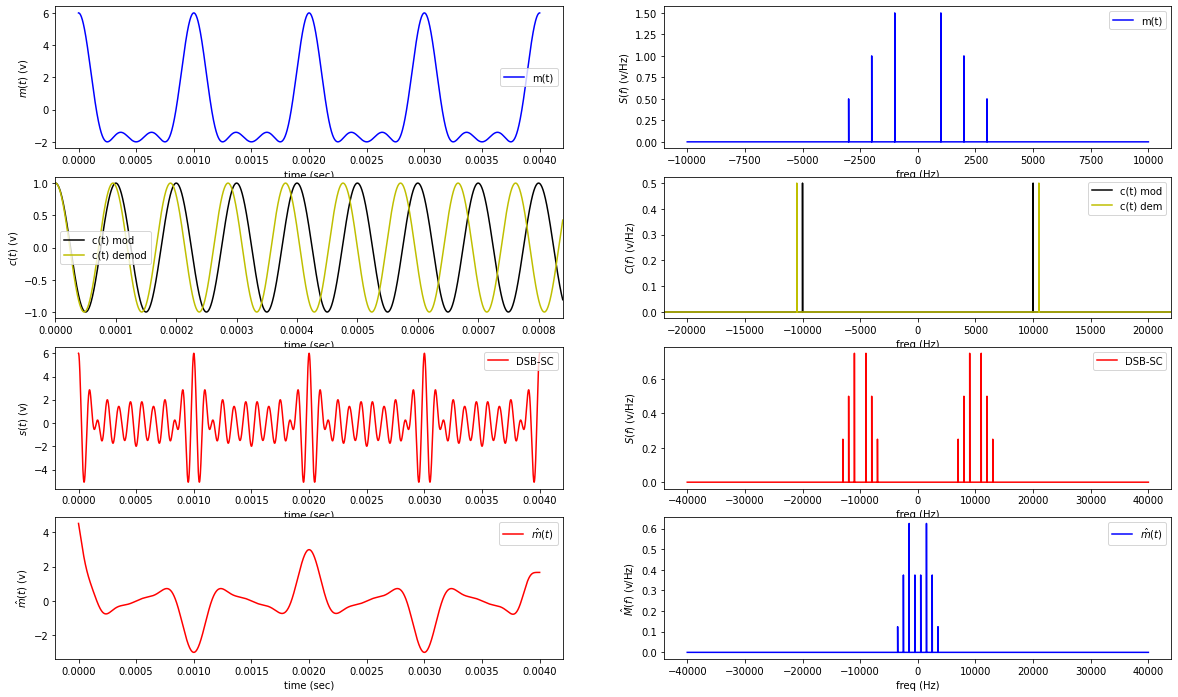

In [22]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=2 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=1 # amplitude of message signal
fm3=3000 # fequency of carrier signal

Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

## LPF parameters 
f3db = 6000  # Cut-off frequency of the filter
forder=5 # order of the filter

df=500 #carrier noncoherence in frequency
###############################################
## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)


## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm
t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

# DSB-SC Modulation
ct_mod=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct_mod) # DSB-SC modulation

## DSB-SC Demodulation
ct_dem=func_ct(Ac,fc+df,t,0) # carrier
rt=DSBSC_demod(st,ct_dem) # DSB-SC demodulation

## apply the filter
mhat=func_filter(rt,f3db,Tstep,forder)

f = plt.figure(figsize=(20,12))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax7 = f.add_subplot(427)
ax8 = f.add_subplot(428)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct_mod,'k',label='c(t) mod')
ax3.plot(t,ct_dem,'y',label='c(t) demod')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
xmin, xmax = ax3.get_xlim()
ax3.set_xlim([0, xmax/5])
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

ax7.plot(t,mhat,'r',label='$\hat{m}(t)$')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$\hat{m}(t)$ (v)')
ax7.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()


Tstart=0; Tstop=100000/fc; Tstep=0.125/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

# DSB-SC Modulation
ct_mod=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct_mod) # DSB-SC modulation

# DSB-SC Demodulation
ct_dem=func_ct(Ac,fc+df,t,0) # carrier
rt=DSBSC_demod(st,ct_dem) # DSB-SC demodulation

mhat=func_filter(rt,f3db,Tstep,forder)
mhat=np.array(mhat)

## cf at mod
Cf = np.abs(np.fft.fft(ct_mod))
freqs = np.fft.fftfreq(ct_mod.size, Tstep)
idx = np.argsort(freqs)
freqs_mod=freqs[idx]
Cf_mod=Cf[idx]/N

## cf at demod
Cf = np.abs(np.fft.fft(ct_dem))
freqs = np.fft.fftfreq(ct_dem.size, Tstep)
idx = np.argsort(freqs)
freqs_dem=freqs[idx]
Cf_dem=Cf[idx]/N

ax4.plot(freqs_mod, Cf_mod,'k',label='c(t) mod')
ax4.plot(freqs_dem, Cf_dem,'y',label='c(t) dem')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
xmin, xmax = ax4.get_xlim()
ax4.set_xlim([xmin/2, xmax/2])
ax4.legend()


Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Mhatf = np.abs(np.fft.fft(mhat))
freqs = np.fft.fftfreq(mhat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mhatf=Mhatf[idx]/N
ax8.plot(freqs, Mhatf,'b',label='$\hat{m}(t)$')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$\hat{M}(f)$ (v/Hz)')
ax8.legend()


As can be observed the signal is distorted and the modulating (message) signal can't be recovered.

**Exercise**: Change the frequency of carrier at demodulator and observe the demdoulated signal.